In [3]:
import scanpy
import wget
import gzip
import shutil
import os

In [4]:
# Download Data
barcode=wget.download('https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM3762869&format=file&file=GSM3762869%5FNaivebm%5Fbarcodes%2Etsv%2Egz')
genes=wget.download('https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM3762869&format=file&file=GSM3762869%5FNaivebm%5Fgenes%2Etsv%2Egz')
matrix=wget.download('https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM3762869&format=file&file=GSM3762869%5FNaivebm%5Fmatrix%2Emtx%2Egz')

In [5]:
# Unzip Files Function
def kat_unzip(zipfile, unzipfile):
    with gzip.open(zipfile, 'rb') as f_in:
        with open(unzipfile,'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

# Create Folder for Samples and Deposit Samples into Folder
foldername = ['naivebm', 'car1gfp']
for i in foldername:
    path = './'+i
    os.mkdir(path)
    if i == 'naivebm':
        barcodes = wget.download('https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM3762869&format=file&file=GSM3762869%5FNaivebm%5Fbarcodes%2Etsv%2Egz')
        genes = wget.download('https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM3762869&format=file&file=GSM3762869%5FNaivebm%5Fgenes%2Etsv%2Egz')
        matrix = wget.download('https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM3762869&format=file&file=GSM3762869%5FNaivebm%5Fmatrix%2Emtx%2Egz')
    elif i == 'car1gfp':
        barcodes = wget.download('https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM3762870&format=file&file=GSM3762870%5FCar1gfp%5Fbarcodes%2Etsv%2Egz')
        genes = wget.download('https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM3762870&format=file&file=GSM3762870%5FCar1gfp%5Fgenes%2Etsv%2Egz')
        matrix = wget.download('https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM3762870&format=file&file=GSM3762870%5FCar1gfp%5Fmatrix%2Emtx%2Egz')
    filename = [barcodes, genes, matrix]
    unzipfilename = ['barcodes.tsv', 'genes.tsv','matrix.mtx' ]
    for j in range(len(filename)):
        kat_unzip(filename[j], path+'/'+unzipfilename[j])


FileExistsError: [Errno 17] File exists: './naivebm'

In [6]:
adata = scanpy.read_10x_mtx('./Downloads/GSE131059_RAW/Naivebm/', cache_compression=None)

In [7]:
adata

AnnData object with n_obs × n_vars = 6458 × 27998
    var: 'gene_ids'

In [8]:
scanpy.pp.calculate_qc_metrics (adata)

(                    n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
 AAACCTGAGATGTCGG-1                433                 6.073045         739.0   
 AAACCTGCACCTGGTG-1                482                 6.180017         753.0   
 AAACCTGCATCTCGCT-1                686                 6.532334        1091.0   
 AAACCTGCATGAACCT-1                760                 6.634633        1331.0   
 AAACCTGGTACATGTC-1                544                 6.300786         917.0   
 ...                               ...                      ...           ...   
 TTTGTCAGTCGGCATC-1                282                 5.645447         748.0   
 TTTGTCAGTCTAGGTT-1                871                 6.770789        1670.0   
 TTTGTCAGTCTGATCA-1                411                 6.021023        1134.0   
 TTTGTCAGTGCACTTA-1                425                 6.054439         637.0   
 TTTGTCATCGTAGATC-1                740                 6.608001        1361.0   
 
                     log1p

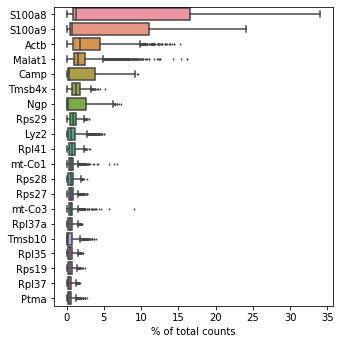

In [9]:
scanpy.pl.highest_expr_genes(adata, n_top=20, )

In [10]:
scanpy.pp.filter_cells(adata, min_genes=200)
scanpy.pp.filter_genes(adata, min_cells=3)

In [11]:
adata.var['mt'] = adata.var_names.str.startswith('mt-') 
adata.var['ribo']= adata.var_names.str.startswith('Rpl','Rps')
adata.var['hemo']= adata.var_names.str.startswith ('')

adata.var

scanpy.pp.calculate_qc_metrics(adata, qc_vars=['mt','ribo'], percent_top=None, log1p=False, inplace=True)

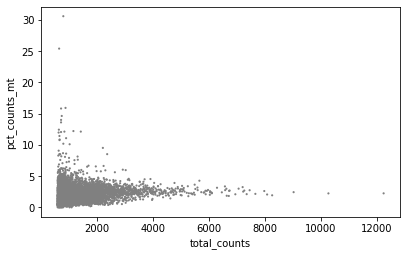

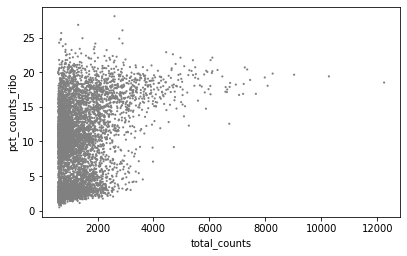

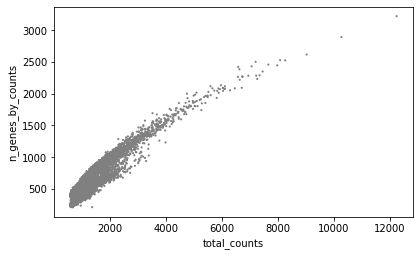

In [12]:
scanpy.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
scanpy.pl.scatter(adata, x='total_counts', y='pct_counts_ribo')
scanpy.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')